In [39]:
import sys
sys.path.append('..')
from src.analyse_utils_keras import plot_history
from src.resnet_keras import *
from src.model_utils_keras import train_model, save_model
from keras.optimizers import Adam

In [2]:
model = resnet(optimizer=Adam(lr=1e-4))
model, history = train_model(model, 400)

Found 236 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
Epoch 1/400
50/50 [==============================] - 23s - loss: 4.6029 - acc: 0.1133 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 2/400
50/50 [==============================] - 19s - loss: 2.3016 - acc: 0.1369 - val_loss: 2.3022 - val_acc: 0.1000
Epoch 3/400
50/50 [==============================] - 19s - loss: 2.2799 - acc: 0.1531 - val_loss: 2.3021 - val_acc: 0.1333
Epoch 4/400
50/50 [==============================] - 19s - loss: 2.2775 - acc: 0.1554 - val_loss: 2.3021 - val_acc: 0.1000
Epoch 5/400
50/50 [==============================] - 19s - loss: 2.2776 - acc: 0.1564 - val_loss: 2.3023 - val_acc: 0.1333
Epoch 6/400
50/50 [==============================] - 19s - loss: 2.2603 - acc: 0.1590 - val_loss: 2.3025 - val_acc: 0.1000
Epoch 7/400
50/50 [==============================] - 19s - loss: 2.2721 - acc: 0.1525 - val_loss: 2.3025 - val_acc: 0.1000
Epoch 8/400
50/50 [==============================] - 19s

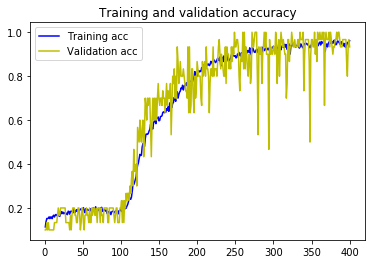

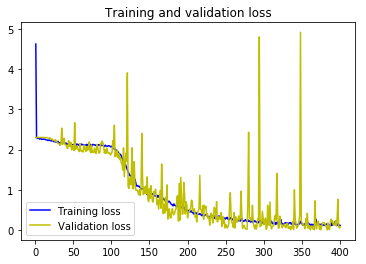

In [3]:
plot_history(history)

In [4]:
save_model(model, history, 'resnet_keras')

In [ ]:
model = resnet(optimizer=Adam(lr=1e-4))
model, history = train_model(model, 400)

Found 236 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
Epoch 1/400
50/50 [==============================] - 22s - loss: 3.7501 - acc: 0.1344 - val_loss: 2.3070 - val_acc: 0.1000
Epoch 2/400
50/50 [==============================] - 19s - loss: 2.3004 - acc: 0.1561 - val_loss: 2.2998 - val_acc: 0.1333
Epoch 3/400
50/50 [==============================] - 19s - loss: 2.2082 - acc: 0.1893 - val_loss: 2.2953 - val_acc: 0.1000
Epoch 4/400
50/50 [==============================] - 19s - loss: 2.1557 - acc: 0.2025 - val_loss: 2.3003 - val_acc: 0.2000
Epoch 5/400
50/50 [==============================] - 19s - loss: 2.0330 - acc: 0.2623 - val_loss: 2.3895 - val_acc: 0.1000
Epoch 6/400
50/50 [==============================] - 19s - loss: 1.9588 - acc: 0.2674 - val_loss: 2.7851 - val_acc: 0.1333
Epoch 7/400
50/50 [==============================] - 19s - loss: 1.8101 - acc: 0.3273 - val_loss: 3.3738 - val_acc: 0.0333
Epoch 8/400
50/50 [==============================] - 19s

In [3]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 128, 128, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 128, 128, 32)  896         input_1[0][0]                    
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 128, 128, 32)  9248        conv2d_1[0][0]                   
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 128, 128, 32)  128         conv2d_2[0][0]                   
___________________________________________________________________________________________

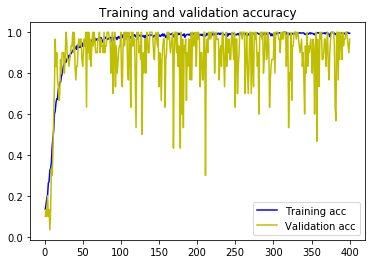

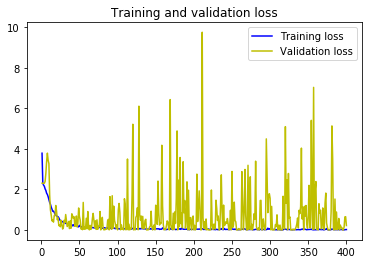

In [4]:
plot_history(history)

In [5]:
save_model(model, history, 'resnet_keras2')

In [2]:
def reduced_resnet(input_shape: tuple=(128, 128, 3), classes: int=10, optimizer: (str, Optimizer)='adam'):
    """Resnet model.
    
    Args:
        input_shape: tuple, image shape, channel last, default (128, 128, 3)
        classes: int, image classes, default 10
        optimizer: str or Optimizer, optimizer to compile model, default adam
    Returns:
        model: Model, resnet model
    """
    inputs = Input(shape=input_shape)
    x = Conv2D(32, 3, activation='relu', padding='same', input_shape=input_shape)(inputs)
    x = identity_block(x, 32)
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = conv_block(x, [32, 64])
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = identity_block(x, 64)
#     x = conv_block(x, [64, 128])
    x = MaxPooling2D()(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='softmax')(x)
    model = Model(inputs, x)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [3]:
model = reduced_resnet(optimizer=Adam(lr=1e-4))
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 32) 128         conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation

In [4]:
model, history = train_model(model, 400)

Found 236 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
Epoch 1/400
50/50 [==============================] - 15s 309ms/step - loss: 5.1875 - acc: 0.1312 - val_loss: 2.2513 - val_acc: 0.2013
Epoch 2/400
50/50 [==============================] - 12s 247ms/step - loss: 2.3815 - acc: 0.1465 - val_loss: 2.2961 - val_acc: 0.1347
Epoch 3/400
50/50 [==============================] - 13s 254ms/step - loss: 2.2962 - acc: 0.1401 - val_loss: 2.2672 - val_acc: 0.1707
Epoch 4/400
50/50 [==============================] - 13s 260ms/step - loss: 2.2399 - acc: 0.1694 - val_loss: 2.1894 - val_acc: 0.1920
Epoch 5/400
50/50 [==============================] - 12s 244ms/step - loss: 2.1735 - acc: 0.1969 - val_loss: 2.0886 - val_acc: 0.2587
Epoch 6/400
50/50 [==============================] - 12s 248ms/step - loss: 2.1128 - acc: 0.2012 - val_loss: 2.0202 - val_acc: 0.2360
Epoch 7/400
50/50 [==============================] - 13s 253ms/step - loss: 2.0184 - acc: 0.2375 - val_loss: 1.87

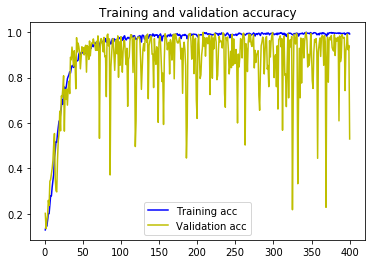

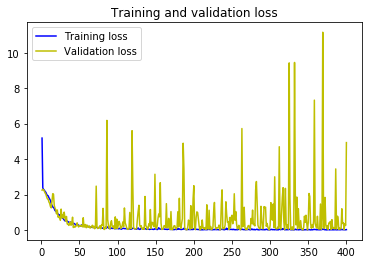

In [5]:
plot_history(history)

In [6]:
save_model(model, history, 'resnet_keras_reduced')

In [2]:
def reduced_resnet(input_shape: tuple=(128, 128, 3), classes: int=10, optimizer: (str, Optimizer)='adam'):
    """Resnet model.
    
    Args:
        input_shape: tuple, image shape, channel last, default (128, 128, 3)
        classes: int, image classes, default 10
        optimizer: str or Optimizer, optimizer to compile model, default adam
    Returns:
        model: Model, resnet model
    """
    inputs = Input(shape=input_shape)
    x = Conv2D(32, 3, activation='relu', padding='same', input_shape=input_shape)(inputs)
#     x = identity_block(x, 32)
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = conv_block(x, [32, 64])
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = identity_block(x, 64)
#     x = conv_block(x, [64, 128])
    x = MaxPooling2D()(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='softmax')(x)
    model = Model(inputs, x)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [3]:
model = reduced_resnet(optimizer=Adam(lr=1e-4))
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 32)   9248        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
batch_norm

In [4]:
model, history = train_model(model, 400)

Found 236 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
Epoch 1/400
50/50 [==============================] - 20s 409ms/step - loss: 4.9038 - acc: 0.1297 - val_loss: 2.2776 - val_acc: 0.2000
Epoch 2/400
50/50 [==============================] - 12s 243ms/step - loss: 2.3780 - acc: 0.1308 - val_loss: 2.2867 - val_acc: 0.1333
Epoch 3/400
50/50 [==============================] - 12s 247ms/step - loss: 2.2902 - acc: 0.1398 - val_loss: 2.2860 - val_acc: 0.1427
Epoch 4/400
50/50 [==============================] - 13s 251ms/step - loss: 2.2342 - acc: 0.1809 - val_loss: 2.2017 - val_acc: 0.2573
Epoch 5/400
50/50 [==============================] - 12s 231ms/step - loss: 2.2536 - acc: 0.1625 - val_loss: 2.2023 - val_acc: 0.1827
Epoch 6/400
50/50 [==============================] - 12s 239ms/step - loss: 2.2044 - acc: 0.1907 - val_loss: 2.1314 - val_acc: 0.2800
Epoch 7/400
50/50 [==============================] - 12s 247ms/step - loss: 2.1692 - acc: 0.2160 - val_loss: 2.12

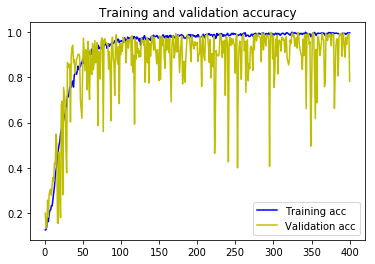

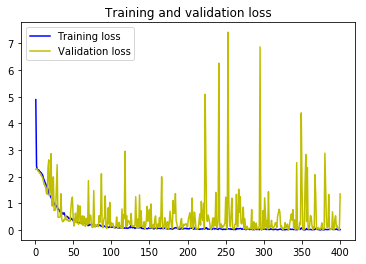

In [5]:
plot_history(history)

In [6]:
save_model(model, history, 'resnet_keras_reduced2')

In [15]:
def reduced_resnet(input_shape: tuple=(128, 128, 3), classes: int=10, optimizer: (str, Optimizer)='adam'):
    """Resnet model.
    
    Args:
        input_shape: tuple, image shape, channel last, default (128, 128, 3)
        classes: int, image classes, default 10
        optimizer: str or Optimizer, optimizer to compile model, default adam
    Returns:
        model: Model, resnet model
    """
    inputs = Input(shape=input_shape)
    x = Conv2D(8, 3, activation='relu', input_shape=input_shape)(inputs)
#     x = identity_block(x, 32)
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = conv_block(x, [8, 8])
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = identity_block(x, 8)
#     x = conv_block(x, [64, 128])
    x = MaxPooling2D()(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='softmax')(x)
    model = Model(inputs, x)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [16]:
model = reduced_resnet(optimizer=Adam(lr=1e-4))
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 126, 126, 8)  224         input_6[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D) (None, 63, 63, 8)    0           conv2d_31[0][0]                  
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 63, 63, 8)    584         max_pooling2d_16[0][0]           
__________________________________________________________________________________________________
batch_norm

In [17]:
model, history = train_model(model, 400)

Found 236 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
Epoch 1/400
50/50 [==============================] - 14s 281ms/step - loss: 6.1058 - acc: 0.0986 - val_loss: 2.7991 - val_acc: 0.1373
Epoch 2/400
50/50 [==============================] - 12s 243ms/step - loss: 4.2608 - acc: 0.1304 - val_loss: 2.4130 - val_acc: 0.1320
Epoch 3/400
50/50 [==============================] - 12s 247ms/step - loss: 3.2728 - acc: 0.1024 - val_loss: 2.2990 - val_acc: 0.1627
Epoch 4/400
50/50 [==============================] - 13s 256ms/step - loss: 2.7840 - acc: 0.1228 - val_loss: 2.2951 - val_acc: 0.1520
Epoch 5/400
50/50 [==============================] - 12s 245ms/step - loss: 2.3392 - acc: 0.1331 - val_loss: 2.2993 - val_acc: 0.1120
Epoch 11/400
50/50 [==============================] - 12s 247ms/step - loss: 2.3273 - acc: 0.1438 - val_loss: 2.2990 - val_acc: 0.1347
Epoch 12/400
50/50 [==============================] - 13s 256ms/step - loss: 2.3307 - acc: 0.1147 - val_loss: 2.

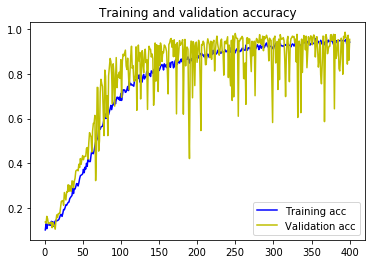

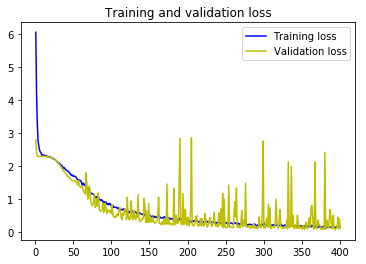

In [18]:
plot_history(history)

In [19]:
save_model(model, history, 'resnet_keras_reduced3')

In [24]:
def reduced_resnet(input_shape: tuple=(128, 128, 3), classes: int=10, optimizer: (str, Optimizer)='adam'):
    """Resnet model.
    
    Args:
        input_shape: tuple, image shape, channel last, default (128, 128, 3)
        classes: int, image classes, default 10
        optimizer: str or Optimizer, optimizer to compile model, default adam
    Returns:
        model: Model, resnet model
    """
    inputs = Input(shape=input_shape)
    x = Conv2D(8, 3, activation='relu', input_shape=input_shape)(inputs)
#     x = identity_block(x, 32)
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = conv_block(x, [8, 8])
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = identity_block(x, 8)
    x = MaxPooling2D()(x)
#     x = conv_block(x, [64, 128])
    x = identity_block(x, 8)
    x = MaxPooling2D()(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='softmax')(x)
    model = Model(inputs, x)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [25]:
model = reduced_resnet(optimizer=Adam(lr=1e-4))
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 126, 126, 8)  224         input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_24 (MaxPooling2D) (None, 63, 63, 8)    0           conv2d_48[0][0]                  
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 63, 63, 8)    584         max_pooling2d_24[0][0]           
__________________________________________________________________________________________________
batch_norm

In [26]:
model, history = train_model(model, 400)

Found 236 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
Epoch 1/400
50/50 [==============================] - 14s 282ms/step - loss: 6.9663 - acc: 0.1148 - val_loss: 2.8375 - val_acc: 0.1253
Epoch 2/400
50/50 [==============================] - 12s 247ms/step - loss: 5.7375 - acc: 0.0927 - val_loss: 2.6536 - val_acc: 0.0973
Epoch 3/400
50/50 [==============================] - 12s 245ms/step - loss: 4.6137 - acc: 0.1062 - val_loss: 2.5267 - val_acc: 0.1093
Epoch 4/400
50/50 [==============================] - 13s 255ms/step - loss: 3.9938 - acc: 0.1139 - val_loss: 2.3677 - val_acc: 0.1307
Epoch 5/400
50/50 [==============================] - 12s 235ms/step - loss: 3.4798 - acc: 0.1154 - val_loss: 2.3042 - val_acc: 0.1493
Epoch 6/400
50/50 [==============================] - 12s 239ms/step - loss: 3.2645 - acc: 0.1131 - val_loss: 2.3113 - val_acc: 0.1320
Epoch 7/400
50/50 [==============================] - 12s 245ms/step - loss: 3.0383 - acc: 0.1085 - val_loss: 2.28

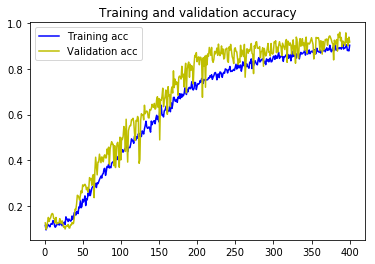

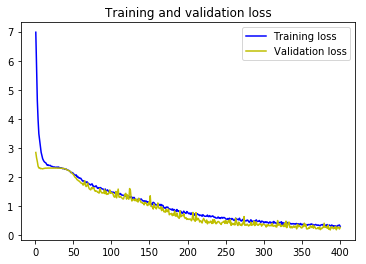

In [27]:
plot_history(history)

In [28]:
save_model(model, history, 'resnet_keras_reduced4')

In [40]:
def reduced_resnet(input_shape: tuple=(128, 128, 3), classes: int=10, optimizer: (str, Optimizer)='adam'):
    """Resnet model.
    
    Args:
        input_shape: tuple, image shape, channel last, default (128, 128, 3)
        classes: int, image classes, default 10
        optimizer: str or Optimizer, optimizer to compile model, default adam
    Returns:
        model: Model, resnet model
    """
    inputs = Input(shape=input_shape)
    x = Conv2D(8, 3, activation='relu', input_shape=input_shape)(inputs)
#     x = identity_block(x, 32)
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = conv_block(x, [8, 8])
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = identity_block(x, 8)
    x = MaxPooling2D()(x)
#     x = conv_block(x, [64, 128])
    x = identity_block(x, 8)
    x = MaxPooling2D()(x)
    x = identity_block(x, 8)
    x = MaxPooling2D()(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='softmax')(x)
    model = Model(inputs, x)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [41]:
model = reduced_resnet(optimizer=Adam(lr=1e-4))
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_86 (Conv2D)              (None, 126, 126, 8)  224         input_13[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_43 (MaxPooling2D) (None, 63, 63, 8)    0           conv2d_86[0][0]                  
__________________________________________________________________________________________________
conv2d_87 (Conv2D)              (None, 63, 63, 8)    584         max_pooling2d_43[0][0]           
__________________________________________________________________________________________________
batch_norm

In [ ]:
model, history = train_model(model, 400)

Found 236 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
Epoch 1/400
50/50 [==============================] - 15s 298ms/step - loss: 5.9291 - acc: 0.1052 - val_loss: 2.4888 - val_acc: 0.1253
Epoch 2/400
50/50 [==============================] - 12s 239ms/step - loss: 4.9103 - acc: 0.1041 - val_loss: 2.4891 - val_acc: 0.1227
Epoch 3/400
50/50 [==============================] - 12s 243ms/step - loss: 4.2560 - acc: 0.1090 - val_loss: 2.3808 - val_acc: 0.1373
Epoch 4/400
50/50 [==============================] - 13s 254ms/step - loss: 3.8612 - acc: 0.1033 - val_loss: 2.4054 - val_acc: 0.1333
Epoch 5/400
50/50 [==============================] - 12s 235ms/step - loss: 3.5859 - acc: 0.1183 - val_loss: 2.3498 - val_acc: 0.1427
Epoch 6/400
44/50 [=========================>....] - ETA: 0s - loss: 3.4145 - acc: 0.0919

In [ ]:
plot_history(history)

In [ ]:
save_model(model, history, 'resnet_keras_reduced5')

In [ ]:
def reduced_resnet(input_shape: tuple=(128, 128, 3), classes: int=10, optimizer: (str, Optimizer)='adam'):
    """Resnet model.
    
    Args:
        input_shape: tuple, image shape, channel last, default (128, 128, 3)
        classes: int, image classes, default 10
        optimizer: str or Optimizer, optimizer to compile model, default adam
    Returns:
        model: Model, resnet model
    """
    inputs = Input(shape=input_shape)
    x = Conv2D(8, 3, activation='relu', input_shape=input_shape)(inputs)
#     x = identity_block(x, 32)
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = conv_block(x, [8, 8])
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = identity_block(x, 8)
    x = MaxPooling2D()(x)
#     x = conv_block(x, [64, 128])
    x = identity_block(x, 8)
    x = MaxPooling2D()(x)
    x = identity_block(x, 8)
    x = MaxPooling2D()(x)
#     x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
#     x = Dropout(0.5)(x)
    x = Dense(10, activation='softmax')(x)
    model = Model(inputs, x)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [ ]:
model = reduced_resnet(optimizer=Adam(lr=1e-4))
model.summary()

In [ ]:
model, history = train_model(model, 400)

In [ ]:
plot_history(history)

In [ ]:
save_model(model, history, 'resnet_keras_reduced5_no_dropout')